In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SWING/HOMERUN/seoul_air.csv')
df

,Unnamed: 0,Date,Gu,PM10,PM2.5,O3,NO2,CO,SO2
0,0,2023-01-01,중랑구,52.0,39.0,0.0210,0.0300,0.70,0.0030
1,1,2023-01-01,중구,54.0,46.0,0.0260,0.0230,0.60,0.0040
2,2,2023-01-01,종로구,53.0,42.0,0.0250,0.0220,0.70,0.0040
3,3,2023-01-01,은평구,55.0,37.0,0.0230,0.0210,0.80,0.0040
4,4,2023-01-01,용산구,50.0,37.0,0.0240,0.0190,0.60,0.0040
...,...,...,...,...,...,...,...,...,...
4753,4753,2023-07-02,강서구,19.0,12.0,0.0329,0.0121,0.38,0.0027
4754,4754,2023-07-02,강북구,24.0,15.0,0.0369,0.0051,0.34,0.0021
4755,4755,2023-07-02,강동구,22.0,15.0,0.0344,0.0105,0.36,0.0024
4756,4756,2023-07-02,강남구,21.0,15.0,0.0431,0.0132,0.33,0.0031


In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df1 = df.copy()

In [ ]:
df1.head()

,Date,Gu,PM10,PM2.5,O3,NO2,CO,SO2
0,2023-01-01,중랑구,52.0,39.0,0.021,0.030,0.7,0.003
1,2023-01-01,중구,54.0,46.0,0.026,0.023,0.6,0.004
2,2023-01-01,종로구,53.0,42.0,0.025,0.022,0.7,0.004
3,2023-01-01,은평구,55.0,37.0,0.023,0.021,0.8,0.004
4,2023-01-01,용산구,50.0,37.0,0.024,0.019,0.6,0.004


In [32]:
# df.info()
# 'Gu' 컬럼에서 '강남구'와 일치하는 데이터만 필터링하여 새로운 데이터프레임 생성
gangnam = df1[df1['Gu'] == '강남구'].reset_index(drop=True)
# gangnam
gangnam.head()

,Date,Gu,PM10,PM2.5,O3,NO2,CO,SO2
0,2023-01-01,강남구,52.0,36.0,0.0240,0.0240,0.60,0.0040
1,2023-01-02,강남구,24.0,11.0,0.0212,0.0206,0.43,0.0034
2,2023-01-03,강남구,29.0,15.0,0.0162,0.0303,0.51,0.0034
3,2023-01-04,강남구,35.0,22.0,0.0111,0.0412,0.61,0.0036
4,2023-01-05,강남구,47.0,32.0,0.0056,0.0523,0.80,0.0038


In [47]:
## 폰트 깨짐 문제 해결##
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 9, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 보이게 하기

Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


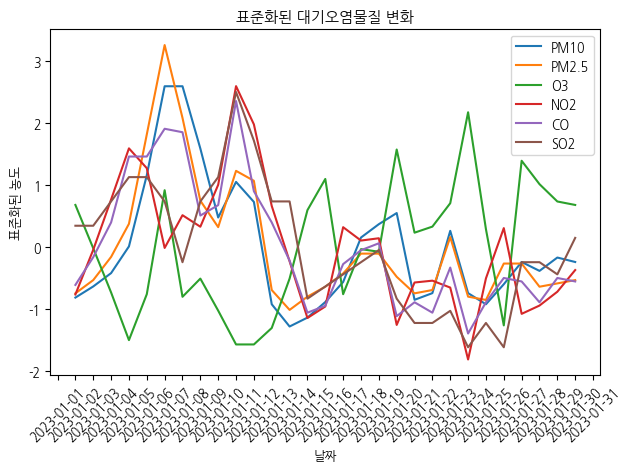

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# 측정날짜를 datetime 형식으로 변환
gangnam['Date'] = pd.to_datetime(gangnam['Date'])

# 필터링을 위한 날짜 범위 설정
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-01-31')

# 필터링된 데이터 추출
filtered_df = gangnam[(gangnam['Date'] > start_date) & (gangnam['Date'] < end_date)]

# x축 데이터
x = filtered_df['Date']

# y축 데이터
y_pm10 = filtered_df['PM10']
y_pm25 = filtered_df['PM2.5']
y_o3 = filtered_df['O3']
y_no2 = filtered_df['NO2']
y_co = filtered_df['CO']
y_so2 = filtered_df['SO2']

# 데이터 표준화
y_pm10_std = (y_pm10 - np.mean(y_pm10)) / np.std(y_pm10)
y_pm25_std = (y_pm25 - np.mean(y_pm25)) / np.std(y_pm25)
y_o3_std = (y_o3 - np.mean(y_o3)) / np.std(y_o3)
y_no2_std = (y_no2 - np.mean(y_no2)) / np.std(y_no2)
y_co_std = (y_co - np.mean(y_co)) / np.std(y_co)
y_so2_std = (y_so2 - np.mean(y_so2)) / np.std(y_so2)

# 그래프 생성
plt.plot(x, y_pm10_std, label='PM10')
plt.plot(x, y_pm25_std, label='PM2.5')
plt.plot(x, y_o3_std, label='O3')
plt.plot(x, y_no2_std, label='NO2')
plt.plot(x, y_co_std, label='CO')
plt.plot(x, y_so2_std, label='SO2')

# 그래프 제목과 축 레이블 설정
plt.title('표준화된 대기오염물질 변화')
plt.xlabel('날짜')
plt.ylabel('표준화된 농도')



# x축 눈금 설정
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# 범례 표시
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


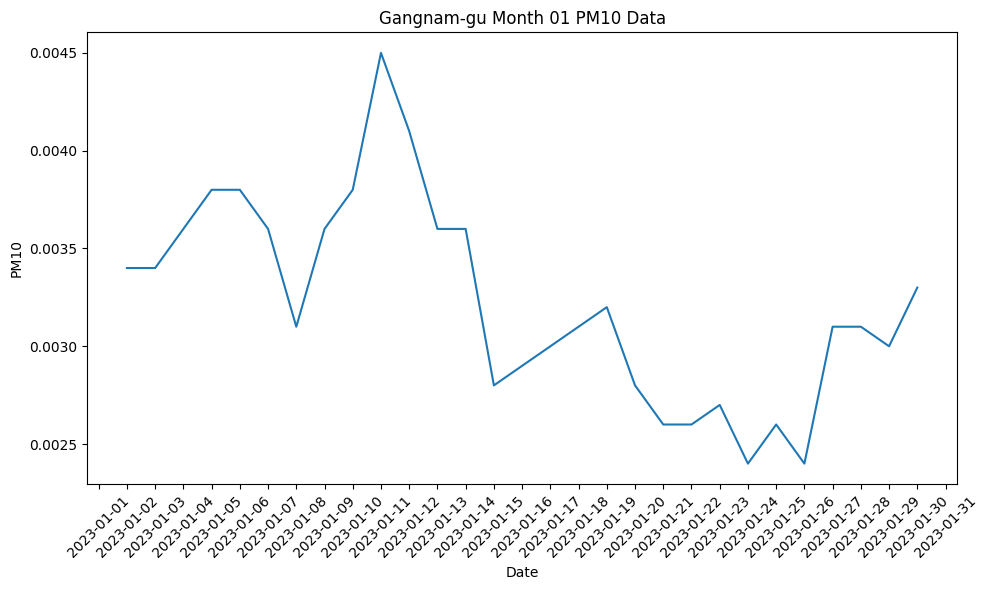

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 측정날짜를 datetime 형식으로 변환
gangnam['Date'] = pd.to_datetime(gangnam['Date'])

# 필터링을 위한 날짜 범위 설정
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-01-31')

# 필터링된 데이터 추출
filtered_df = gangnam[(gangnam['Date'] > start_date) & (gangnam['Date'] < end_date)]

# 그래프 설정
fig, ax = plt.subplots(figsize=(10, 6))

# misemunji 칼럼 생성하든어쩌든 하기
#ax.plot(filtered_df['Date'], filtered_df['PM10'])
#ax.plot(filtered_df['Date'], filtered_df['PM2.5'])
# ax.plot(filtered_df['Date'], filtered_df['O3'])
# ax.plot(filtered_df['Date'], filtered_df['NO2'])
# ax.plot(filtered_df['Date'], filtered_df['CO'])
ax.plot(filtered_df['Date'], filtered_df['SO2'])

ax.set_xlabel('Date')
ax.set_ylabel('PM10')
ax.set_title('Gangnam-gu Month 01 PM10 Data')

# x축 눈금 설정
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
# plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'})
plt.tight_layout()

# 그래프 출력
plt.show()